In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
zip = ZipFile('../Dataset/PeNSE_2015_AMOSTRA2.zip')

In [3]:
zip.namelist()[1]

'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

In [4]:
pense_2015 = pd.read_csv(zip.open(zip.namelist()[1]),sep=';', thousands='.', decimal=',')

In [5]:
pense_2015.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296


## Desafio: Abrir os arquivos por comandos Linux

In [6]:
#!unzip ../Dataset/PeNSE_2015_AMOSTRA2.zip 

In [7]:
# pense_2015_desafio = pd.read_csv("../Dataset/arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV",sep=';')

In [8]:
# pense_2015_desafio.head()

## Final Desafio: Abrir os arquivos por comandos Linux

In [9]:
pense_2015.shape

(16556, 181)

In [10]:
pense_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [11]:
#selecionar os dados por tipo de dado
pense_2015.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


## Desafio 03 - Classificar algumas perguntas como QualitativaXQuantitativa

A maioria das colunas VB** são Qualitativas, menos: 

| VB17001 |  VB17002 |  VB17003 | VB17004 | TEMPODESLOC | TEMPOTOTAL | TEMPOEDFIS | TEMPOEXTRA | TEMPOEST | PESO
|----------|:-------------:|------:|------:|------:|------:|------:|------:|------:|------:|
| peso_aluno |  altura_aluno | peso_incluindo_imputados |altura_incluindo_imputados|tempo_deslocamento|tempo_total|tempo_exercicio_fisico_ultimos_7_dias|tempo_atividade_fisica_extra_escolar|tempo_total_atividade_fisica|Peso_aluno_amostra


## Desafio 03 - Final

In [12]:
pense_2015['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [13]:
pense_2015['VB01001'].value_counts(normalize=True) * 100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

#### `Criando tabelas de Frequencia`

In [14]:
frequencia =pense_2015['VB11007'].value_counts() # Frequencia

In [15]:
percentual = pense_2015['VB11007'].value_counts(normalize=True) * 100 #percentual

In [16]:
respostas = {
   1 : 'Muito satisfeito',
   2 : 'Satisfeito',
   3 : 'Indiferente',
   4 : 'Insatisfeito',
   5 : 'Muito insatisfeito',
   99 : 'Não informado'
}
dist_freq = pd.DataFrame({'Frequencia': frequencia, 'Percentual': percentual}) # tabela de distribuiçao
dist_freq.rename(index = respostas, inplace=True)
dist_freq.rename_axis('Sentimento em relaçao ao seu corpo',axis=1, inplace=True)
dist_freq

Sentimento em relaçao ao seu corpo,Frequencia,Percentual
Satisfeito,6920,41.797536
Muito satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito insatisfeito,714,4.312636
Não informado,181,1.093259


#### `Final tabelas de Frequencia`

# Desafio 04: Criar uma funçao para gerar as tabelas de frequencia, e fazer a analise de outras informaçoes

In [17]:
def tabela_frequencia(df,coluna,titulo='respostas',resposta=None):
    dist_freq = pd.DataFrame({'Frequencia': df[coluna].value_counts(), 
                              'Percentual': df[coluna].value_counts(normalize=True)*100}) 
    if resposta:
        dist_freq.rename(index = resposta, inplace=True)
    dist_freq.rename_axis(titulo,axis=1, inplace=True)
    return dist_freq

In [18]:
resposta_tv = {
    1:'Até 1 hora por dia',
    2:'Mais de 1 hora até 2 horas por dia',
    3:'Mais de 2 horas até 3 horas por dia',
    4:'Mais de 3 horas até 4 horas por dia',
    5:'Mais de 4 horas até 5 horas por dia',
    6:'Mais de 5 horas até 6 horas por dia',
    7:'Mais de 6 horas até 7 horas por dia',
    8:'Mais de 7 horas até 8 horas por dia',
    9:'Mais de 8 horas por dia',
    99:'Não informado',
}
tempo_assistindo_tv = tabela_frequencia(pense_2015,'VB03010A','Horas por dia assiste TV',resposta_tv)
tempo_assistindo_tv

Horas por dia assiste TV,Frequencia,Percentual
Até 1 hora por dia,3871,23.381252
Mais de 1 hora até 2 horas por dia,2235,13.499638
Mais de 2 horas até 3 horas por dia,2176,13.143271
Mais de 3 horas até 4 horas por dia,1936,11.693646
Mais de 8 horas por dia,1858,11.222518
Mais de 4 horas até 5 horas por dia,1536,9.277603
Mais de 5 horas até 6 horas por dia,1241,7.495772
Mais de 6 horas até 7 horas por dia,932,5.629379
Mais de 7 horas até 8 horas por dia,687,4.149553
Não informado,84,0.507369


In [19]:
resposta_legumes = {
    1:'Não comi legumes ou verduras nos últimos 30 dias',
    2:'Menos de uma vez por dia (não comi todos os dias)',
    3:'1 vez por dia',
    4:'2 vezes por dia',
    5:'3 vezes por dia',
    6:'4 vezes por dia',
    7:'5 ou mais vezes por dia',
    99:'Não informado'
}
legumes_ultimos_30_dias = tabela_frequencia(pense_2015,'VB02026','comeu legumes nos últimos 30 dias',resposta_legumes)
legumes_ultimos_30_dias

comeu legumes nos últimos 30 dias,Frequencia,Percentual
Menos de uma vez por dia (não comi todos os dias),3756,22.686639
1 vez por dia,3710,22.408794
2 vezes por dia,3093,18.682049
Não comi legumes ou verduras nos últimos 30 dias,2145,12.956028
5 ou mais vezes por dia,1890,11.415801
3 vezes por dia,1265,7.640734
4 vezes por dia,638,3.853588
Não informado,59,0.356366


In [20]:
resposta_fastfood = {
    1:'Não comi em restaurantes fast food nos últimos 7 dias (0 dia)',
    2:'1 dia nos últimos 7 dias',
    3:'2 dias nos últimos 7 dias',
    4:'3 dias nos últimos 7 dias',
    5:'4 dias nos últimos 7 dias',
    6:'5 dias nos últimos 7 dias',
    7:'6 dias nos últimos 7 dias',
    8:'Todos os dias nos últimos 7 dias',
    99:'Não informado' 
}
fast_food_ultimos_7_dias = tabela_frequencia(pense_2015,'VB02023','comeu fastfood últimos 7 dias',resposta_fastfood)
fast_food_ultimos_7_dias

comeu fastfood últimos 7 dias,Frequencia,Percentual
Não comi em restaurantes fast food nos últimos 7 dias (0 dia),8715,52.639526
1 dia nos últimos 7 dias,3408,20.584682
2 dias nos últimos 7 dias,1848,11.162116
3 dias nos últimos 7 dias,1026,6.197149
4 dias nos últimos 7 dias,547,3.303938
Todos os dias nos últimos 7 dias,391,2.361682
5 dias nos últimos 7 dias,349,2.107997
6 dias nos últimos 7 dias,235,1.419425
Não informado,37,0.223484


# Desafio 04: FIM funçao para gerar as tabelas de frequencia, e fazer a analise de outras informaçoes

##### Calcular o IMC

In [21]:
pense_2015['IMC'] = pense_2015['VB17003'] / ((pense_2015['VB17004']/100)**2)
pense_2015['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [22]:
classes = [0, 18.5, 25, 30, 60]
label = ['abaixo', 'normal','sobrepeso','obesidad']

#Use cut quando precisar segmentar e classificar os valores dos dados em compartimentos.
#Esta função também é útil para passar de uma variável contínua a uma variável categórica.
pense_2015['CLASSE_IMC'] = pd.cut(x = pense_2015['IMC'],
        bins= classes,
          labels = label,
      include_lowest=True)

In [23]:
pense_2015[['IMC','CLASSE_IMC']]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


In [24]:
dist_freq_imc = tabela_frequencia(pense_2015,'CLASSE_IMC','Classe IMC')
dist_freq_imc

Classe IMC,Frequencia,Percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidad,633,3.823387


##### clasificar a altura

In [25]:
pense_2015['VB17004'].min()

124.1

In [26]:
pense_2015['VB17004'].max()

195.3

#### Determinar o tamanho da amostra

O Regra de Sturges é um critério usado para determinar o número de classes ou intervalos que são necessários para representar graficamente um conjunto de dados estatísticos.
Sturges propôs um método simples, baseado no número de amostras x que permitiria encontrar o número de classes e sua amplitude de amplitude. A regra de Sturges é amplamente usada especialmente na área de estatística, especificamente para construir histogramas de frequência.

`exemplo do calculo`

**tamanho_amostra = len(amostra)
k = 1 + ((10/3)*np.log10(tamanho_amostra))**



In [27]:
tamanho_amostra = len(pense_2015)
k = int(1 + ((10/3)*np.log10(tamanho_amostra)))
k

15

In [28]:
pense_2015['CLASSE_ALTURA'] = pd.cut(x = pense_2015['VB17004'],
        bins= k,
      include_lowest=True)


In [29]:
tabela_frequencia(pense_2015,'CLASSE_ALTURA','CLASSE_ALTURA')

CLASSE_ALTURA,Frequencia,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


#### Desafio 05: Criar uma tabela de Frequencia com o PESO

In [30]:
pense_2015['CLASSE_PESO'] = pd.cut(x = pense_2015['VB17003'],
        bins= k,
      include_lowest=True)

tabela_frequencia(pense_2015,'CLASSE_PESO','CLASSE_PESO')

CLASSE_PESO,Frequencia,Percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


#### Desafio 05: Final tabela de Frequencia com o PESO

In [31]:
frequencia_cruzada = pd.crosstab(pense_2015['VB11007'],pense_2015['VB01001'])
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada.rename(columns = {1:'Masculino',2: 'Femenino'},inplace=True)
frequencia_cruzada

VB01001,Masculino,Femenino
VB11007,,
Muito satisfeito,2682,1926
Satisfeito,3490,3430
Indiferente,950,857
Insatisfeito,786,1540
Muito insatisfeito,260,454
Não informado,119,62


### Crosstab
link: https://pbpython.com/pandas-crosstab.html

In [32]:
#Podemos normalizar para ter os porcentagens com Normalize, por columns (proporçoes por colunas ou por indice='index'(linhas))
#soma dos valores deve dar 100% dependendo se escolhemos indice ou columns
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada = pd.crosstab(pense_2015['VB11007'],pense_2015['VB01001'],normalize='columns') 
frequencia_cruzada.rename(columns = {1:'Masculino',2: 'Femenino'},inplace=True)
frequencia_cruzada

VB01001,Masculino,Femenino
VB11007,,
1,0.323639,0.232918
2,0.421142,0.414802
3,0.114637,0.103640
4,0.094847,0.186238
5,0.031374,0.054904
99,0.014360,0.007498


In [33]:
satisfacao = {
    1:'Muito satisfeito(a)',
    2:'Satisfeito(a)',
    3:'Indiferente',
    4:'Insatisfeito(a)',
    5:'Muito insatisfeito(a)',
    99:'Não informado'
}

In [34]:
#Podemos normalizar para ter os porcentagens com Normalize, por columns (proporçoes por colunas ou por indice='index'(linhas))
#soma dos valores deve dar 100% dependendo se escolhemos indice ou columns
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada = pd.crosstab([pense_2015['VB11007'],pense_2015['CLASSE_IMC']],pense_2015['VB01001'],normalize='columns', margins=True, margins_name='Total')* 100
frequencia_cruzada.rename(columns = {1:'Masculino',2: 'Femenino'},inplace=True)
frequencia_cruzada.rename(satisfacao, inplace=True)
frequencia_cruzada

VB01001                           Masculino   Femenino      Total
VB11007               CLASSE_IMC                                 
Muito satisfeito(a)   abaixo      12.598045   8.936994  10.769510
                      normal      17.183540  12.540815  14.864702
                      sobrepeso    2.111741   1.475390   1.793912
                      obesidad     0.470617   0.338614   0.404687
Satisfeito(a)         abaixo      12.585978  12.190108  12.388258
                      normal      24.701339  25.468618  25.084561
                      sobrepeso    3.692530   3.168461   3.430780
                      obesidad     1.134307   0.653041   0.893936
Indiferente           abaixo       3.137444   2.418672   2.778449
                      normal       5.707735   5.708066   5.707900
                      sobrepeso    1.761796   1.523763   1.642909
                      obesidad     0.856764   0.713508   0.785214
Insatisfeito(a)       abaixo       1.858332   3.603822   2.730128
                      normal       4.814770   9.940743   7.374970
                      sobrepeso    1.737661   3.773129   2.754288
                      obesidad     1.073971   1.306083   1.189901
Muito insatisfeito(a) abaixo       0.953300   1.100496   1.026818
                      normal       1.218776   2.454952   1.836192
                      sobrepeso    0.711958   1.136776   0.924136
                      obesidad     0.253409   0.798162   0.525489
Não informado         abaixo       0.482684   0.229774   0.356366
                      normal       0.820562   0.435361   0.628171
                      sobrepeso    0.096537   0.072560   0.084561
                      obesidad     0.036201   0.012093   0.024160

# Desafio 06: Criar crosstab testanto Aggfunc

In [35]:
frequencia_cruzada.rename(index=respostas, inplace=True)
frequencia_cruzada = pd.crosstab(pense_2015['VB11007'],pense_2015['VB01001'],pense_2015['VB11007'],aggfunc=np.sum,margins=True)
frequencia_cruzada.rename(columns = {1:'Masculino',2: 'Femenino'},inplace=True)
frequencia_cruzada.rename(satisfacao, inplace=True)
frequencia_cruzada

VB01001,Masculino,Femenino,All
VB11007,,,
Muito satisfeito(a),2682,1926,4608
Satisfeito(a),6980,6860,13840
Indiferente,2850,2571,5421
Insatisfeito(a),3144,6160,9304
Muito insatisfeito(a),1300,2270,3570
Não informado,11781,6138,17919
All,28737,25925,54662


# Desafio 06: Final crosstab testanto Aggfunc

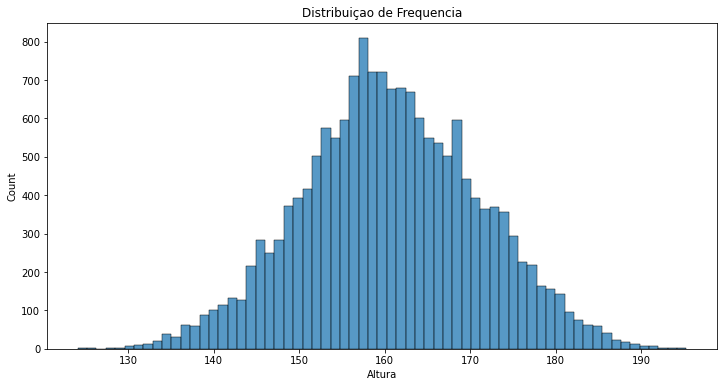

In [36]:
ax = sns.histplot(data= pense_2015, x='VB17004',)

#alterar o tamanho do figure
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuiçao de Frequencia")
ax.set_xlabel("Altura")
plt.show()

#### Calcular desvido padrao e calcular, media, moda e mediana e plotar no grafico

In [37]:
def calculos_estatisticos(coluna,filter_col=None,params=''):
    
    if filter_col:
        if pense_2015['VB01001'].dtype == 'int64':
            params = int(params)    
            
        media = pense_2015[pense_2015[filter_col] == params][coluna].mean()
        mediana = pense_2015[pense_2015[filter_col] == params][coluna].median()
        moda = pense_2015[pense_2015[filter_col] == params][coluna].mode().iloc[0]
        desvio_p = pense_2015[pense_2015[filter_col] == params][coluna].std(ddof=0)
    else:
        media = pense_2015[coluna].mean()
        mediana = pense_2015[coluna].median()
        moda = pense_2015[coluna].mode().iloc[0]
        desvio_p = pense_2015[coluna].std(ddof=0)
    
    return (media, mediana,moda,desvio_p)

In [38]:
media_altura, mediana_altura, moda_altura, desvio_p_altura = calculos_estatisticos('VB17004')

print(f'media: {media_altura},\nmediana: {mediana_altura},\nmoda: {moda_altura},\ndesvido padrao: {desvio_p_altura}')

media: 160.71311307078818,
mediana: 160.4,
moda: 160.0,
desvido padrao: 10.339757953495102


In [39]:
pense_2015[pense_2015['VB01001'] == 1]['VB17004']

2        161.4
3        172.5
4        167.5
8        170.0
11       168.3
         ...  
16548    160.5
16552    185.8
16553    159.4
16554    157.8
16555    163.9
Name: VB17004, Length: 8287, dtype: float64

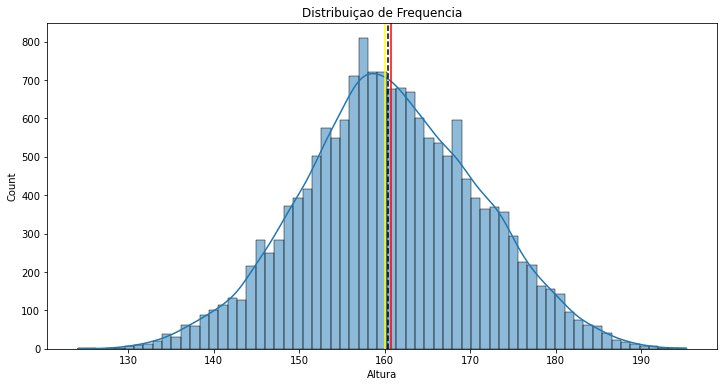

In [40]:
ax = sns.histplot(data= pense_2015, x='VB17004', kde=True)

#alterar o tamanho do figure
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuiçao de Frequencia")
ax.set_xlabel("Altura")

ax.axvline(media_altura, color='red', linestyle='-')
ax.axvline(mediana_altura, color='black', linestyle='--')
ax.axvline(moda_altura, color='yellow', linestyle='-')

plt.show()

### Comparaçoes entre histogramas

In [41]:
media_altura_h, mediana_altura_h, moda_altura_h, desvio_p_altura_h = calculos_estatisticos('VB17004','VB01001','1')
print(f'media: {media_altura_h},\nmediana: {mediana_altura_h},\nmoda: {moda_altura_h},\ndesvido padrao: {desvio_p_altura_h}')

media_altura_m, mediana_altura_m, moda_altura_m, desvio_p_altura_m = calculos_estatisticos('VB17004','VB01001','2')
print(f'media: {media_altura_m},\nmediana: {mediana_altura_m},\nmoda: {moda_altura_m},\ndesvido padrao: {desvio_p_altura_m}')



media: 163.86075781344374,
mediana: 165.5,
moda: 170.0,
desvido padrao: 11.80558379196521
media: 157.5586165195304,
mediana: 158.0,
moda: 160.0,
desvido padrao: 7.382319127234598


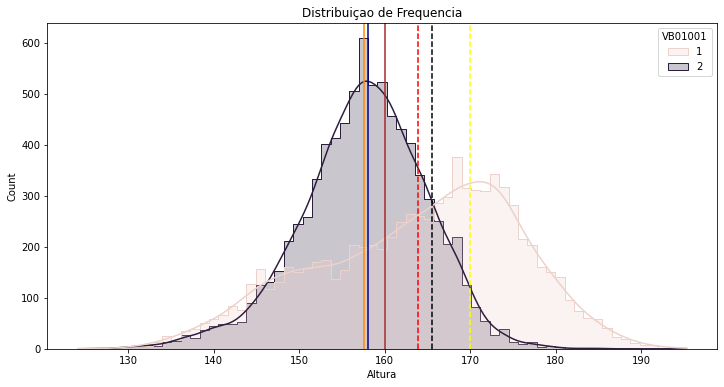

In [42]:
ax = sns.histplot(data= pense_2015, x='VB17004', kde=True, hue='VB01001',element='step',fill=True)

#alterar o tamanho do figure
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuiçao de Frequencia")
ax.set_xlabel("Altura")

#alturas Homem
ax.axvline(media_altura_h, color='red', linestyle='--')
ax.axvline(mediana_altura_h, color='black', linestyle='--')
ax.axvline(moda_altura_h, color='yellow', linestyle='--')

#alturas Mulher
ax.axvline(media_altura_m, color='darkorange', linestyle='-')
ax.axvline(mediana_altura_m, color='darkblue', linestyle='-')
ax.axvline(moda_altura_m, color='brown', linestyle='-')


plt.show()

### BoxPlot

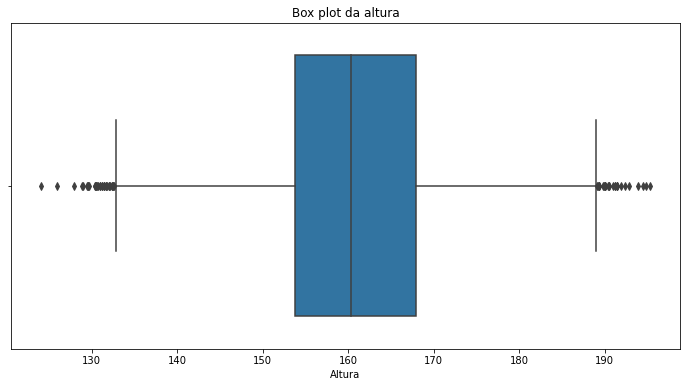

In [43]:
ax = sns.boxplot(data=pense_2015, x='VB17004')

#alterar o tamanho do figure
ax.figure.set_size_inches(12, 6)
ax.set_title("Box plot da altura")
ax.set_xlabel("Altura")


plt.show()

# Desafio tirar os ranges dos outliars

In [44]:
def outliers_data_set(df,coluna):
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    iqr = q3 - q1
    valor_min = q1 - 1.5*iqr
    valor_max = q3 + 1.5*iqr
    print(f' para "{coluna}" os valores menores de: {valor_min:.2f} e valores maiores de: {valor_max:.2f} sao outliers')

In [45]:
outliers_data_set(pense_2015,'VB17004')

 para "VB17004" os valores menores de: 132.65 e valores maiores de: 189.05 sao outliers


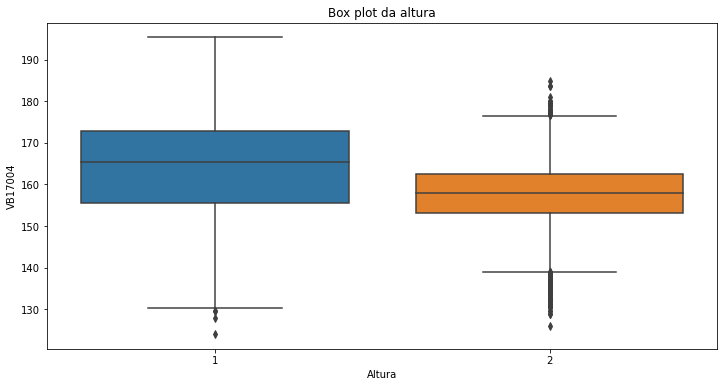

In [46]:
ax = sns.boxplot(data=pense_2015, y='VB17004',x='VB01001')

#alterar o tamanho do figure
ax.figure.set_size_inches(12, 6)
ax.set_title("Box plot da altura")
ax.set_xlabel("Altura")


plt.show()

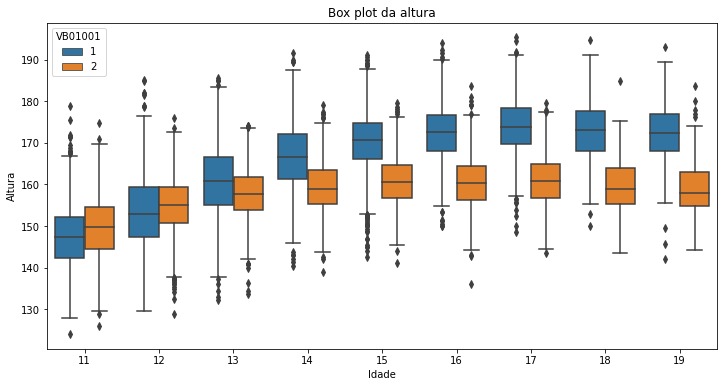

In [47]:
ax = sns.boxplot(data=pense_2015, x='VB01003',y='VB17004',hue='VB01001')

#alterar o tamanho do figure
ax.figure.set_size_inches(12, 6)
ax.set_title("Box plot da altura")
ax.set_ylabel("Altura")
ax.set_xlabel("Idade")


plt.show()

### FIM BoxPlot

# Histograma de densidade

com esta visualizaçao podemos ver os segmentos da amostra com os valores cumulativos

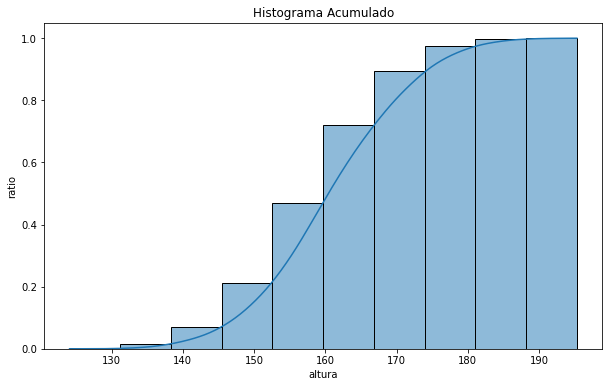

In [48]:
ax = sns.histplot(data=pense_2015, x='VB17004', kde= True,
                 cumulative=True,
                 stat='density',
                 bins=10)
ax.figure.set_size_inches(10,6)
ax.set_title('Histograma Acumulado')
ax.set_ylabel('ratio')
ax.set_xlabel('altura')
plt.show()
# podemos ver por exemplo 20% da amostra tem 1.52m (podemos tirar o dado pelo pense_2015['VB17004'].quantile(20))

In [49]:
pense_2015['VB17004'].mean()

160.71311307078818

In [50]:
pense_2015.groupby(by=['VB01001'])['VB17004'].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [51]:
pense_2015.groupby(by=['VB01001','VB01003'])['VB17004'].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

## Desafio: Fazer o calculo da média por sexo e idade através do Crosstab

In [54]:
pd.crosstab(pense_2015['VB01003'],pense_2015['VB01001'],pense_2015['VB17004'],aggfunc=np.mean,margins=True)

VB01001,1,2,All
VB01003,,,
11,147.617753,149.522512,148.605985
12,153.696764,154.965021,154.369894
13,160.719801,157.673105,159.229168
14,166.406922,159.340320,162.881903
15,170.336297,160.759848,165.644825
16,172.424933,160.386527,166.363304
17,173.814341,160.907937,167.466103
18,173.024561,159.438462,167.691474
19,172.143158,158.977193,165.906648


## Fim Desafio Calculo

In [60]:
media_altura = pense_2015['VB17004'].mean()
pense_2015['MEDIA_ALTURA'] = media_altura
diferenca_medias = pense_2015['VB17004'] - pense_2015['MEDIA_ALTURA']
pense_2015['DIFERENA_MEDIA'] = diferenca_medias

diferenca_quadrada = diferenca_medias**2
pense_2015['DIFERENCA_QUADRADO'] = diferenca_quadrada
pense_2015[['VB17004','MEDIA_ALTURA','DIFERENA_MEDIA','DIFERENCA_QUADRADO']]

,VB17004,MEDIA_ALTURA,DIFERENA_MEDIA,DIFERENCA_QUADRADO
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.9,160.713113,7.186887,51.651344
16552,185.8,160.713113,25.086887,629.351896
16553,159.4,160.713113,-1.313113,1.724266
16554,157.8,160.713113,-2.913113,8.486228


In [65]:
varianca_amostral = (1/(len(pense_2015)-1)) * (pense_2015["DIFERENCA_QUADRADO"].sum())
varianca_amostral

106.91705244049119

In [61]:
pense_2015["DIFERENCA_QUADRADO"].mean()

106.9105945368652

In [66]:
pense_2015['VB17004'].mean()

160.71311307078818

In [67]:
desvio_padrao = np.sqrt(varianca_amostral)
desvio_padrao

10.340070233827776